In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import h5py
import time
import os
from PIL import Image
import re
from keras.models import load_model
from numpy.testing import assert_allclose
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import pandas as pd
import re
import pickle
from io import BytesIO
import io
import random

In [206]:
SOURCE = 'A:/python_data/Natural Language 1/zipped/instagram_data/img'
NUMBER_OF_IMAGES = 1000
dir_list = os.listdir(SOURCE)

#   parent_list = os.listdir("Here goes the path for directory")
#   count =0
#   for child in parent_list:
#    if count < 1000:
#       print(child)
#    else
#        break
#    count = count+1

usable_files = []
i = 0
for filename in dir_list:
    
    if i > NUMBER_OF_IMAGES:
        break
    file_directory = SOURCE + '/' + filename
    
#     removing the directories which are unreadable and give an error in tensorflow for some reason
    try: 
        byteImgIO = io.BytesIO()
        byteImg = Image.open(file_directory)

    except:
        print('Deleted this directory: {}'.format(file_directory))
        os.remove(file_directory)
        continue
    
    usable_files.append(filename)
#     print(usable_files)
    i += 1

len_usable_files = len(usable_files)
shuffled = random.sample(usable_files, len_usable_files)

print('The number of images going to be trained on is: {}'.format(len(shuffled)))


The number of images going to be trained on is: 1001


#### Creating dictionary called 'data' with key= image_name, value = caption

In [207]:
df = pd.read_csv('A:/python_data/Natural Language 1/zipped/instagram_data/captions_csv.csv')
df['Image File'] = df['Image File'].str.extract('/(\w+)')
#adding the .img string to each image file
df['Image File'] = df['Image File'].astype('str') +'.jpg' 
df['Caption'] = df['Caption'].astype(str)

caption = df.loc[df['Image File'] == 'insta10004.jpg']['Caption']

In [208]:
df = pd.read_csv('A:/python_data/Natural Language 1/zipped/instagram_data/captions_csv.csv')
df['Image File'] = df['Image File'].str.extract('/(\w+)')
#adding the .img string to each image file
df['Image File'] = df['Image File'].astype('str') +'.jpg' 
# Creating dictionary called 'data' with key= image_name, value = caption
data = {}
for filename in shuffled:
#     print(filename)
#     df.loc[df['column_name'] == some_value]
    caption = str(df.loc[df['Image File'] == filename]['Caption'])
#     print(caption)
    
    try:
        if len(caption) < 3:
            continue
    except:
        continue
    
        
    #cleaning the captions
    try:
#         print('step1')
        caption_word_list = str(caption).split()
        caption_word_list = caption_word_list[1:-4]
#         print('step2')
        caption_word_list = [re.findall('[a-zA-Z]+', caption)[0] for caption in caption_word_list]
        print('step3')
        print(caption_word_list)
        caption_word_list = [word.lower() for word in caption_word_list]
        print(caption_word_list)
        
        final_caption =''
        for word in caption_word_list:
            final_caption += word + ' '
#         print(final_caption.astype('|S'))
        #adding information to dictionary
        data[filename] = final_caption
    
#     the except is here to handle the error during re.findall[0]
    except:
        continue
    data[filename] = final_caption

print(len(data))
print(len(shuffled))
# assert (len(data) == len(shuffled))
print('If there is no assertion error, you are good to go!')

step3
['Date', 'night']
['date', 'night']
step3
['Found', 'these', 'papers', 'of', 'me', 'writing', 'all', 'of', 'the', 'ca']
['found', 'these', 'papers', 'of', 'me', 'writing', 'all', 'of', 'the', 'ca']
step3
['MET']
['met']
step3
['Stay', 'tuned']
['stay', 'tuned']
step3
['Bae']
['bae']
step3
['Wake', 'up', 'and', 'smell', 'the', 'roses']
['wake', 'up', 'and', 'smell', 'the', 'roses']
step3
['I', 'go', 'back', 'to', 'black']
['i', 'go', 'back', 'to', 'black']
step3
['Rudderless']
['rudderless']
step3
['Thank', 'you', 'God', 'for', 'watching', 'over', 'us', 'and', 'keeping']
['thank', 'you', 'god', 'for', 'watching', 'over', 'us', 'and', 'keeping']
step3
['NaN']
['nan']
step3
['Surprise']
['surprise']
step3
['UM']
['um']
step3
['Puss', 'n', 'boots']
['puss', 'n', 'boots']
step3
['My', 'baby', 'went', 'backstage', 'to', 'get', 'ready', 'to', 'perform']
['my', 'baby', 'went', 'backstage', 'to', 'get', 'ready', 'to', 'perform']
step3
['I', 'done', 'everything', 'I', 'could', 'to', 'the',

step3
['Cannes', 'Clique']
['cannes', 'clique']
step3
['BET', 'Honors', 'is', 'on', 'tonight', 'pm', 'c']
['bet', 'honors', 'is', 'on', 'tonight', 'pm', 'c']
step3
['NaN']
['nan']
step3
['I', 'loved', 'this', 'shoot', 'for', 'Elle', 'France', 'Magazine', 'on']
['i', 'loved', 'this', 'shoot', 'for', 'elle', 'france', 'magazine', 'on']
step3
['Growing', 'up', 'on', 'a', 'Tuesday', 'Happy', 'Birthday', 'LOVE']
['growing', 'up', 'on', 'a', 'tuesday', 'happy', 'birthday', 'love']
step3
['Tonight', 'look', 'Proenza', 'Schouler', 'skirt', 'Margie']
['tonight', 'look', 'proenza', 'schouler', 'skirt', 'margie']
step3
['Getting', 'ready', 'for', 'the', 'launch', 'of', 'my', 'new', 'collect']
['getting', 'ready', 'for', 'the', 'launch', 'of', 'my', 'new', 'collect']
step3
['K']
['k']
step3
['NaN']
['nan']
step3
['Really', 'though']
['really', 'though']
step3
['Hello', 'my', 'name', 'is', 'yolo', 'boi']
['hello', 'my', 'name', 'is', 'yolo', 'boi']
step3
['I', 'never', 'posted', 'these', 'pics', 'd

step3
['NaN']
['nan']
step3
['Bye', 'Jerusalem']
['bye', 'jerusalem']
step3
['I', 'so', 'thankful', 'for', 'my', 'best', 'friend', 'N']
['i', 'so', 'thankful', 'for', 'my', 'best', 'friend', 'n']
step3
['constant']
['constant']
step3
['Tonight', 'was', 'fun', 'Thank', 'you']
['tonight', 'was', 'fun', 'thank', 'you']
step3
['Love', 'this', 'sleek', 'black', 'look']
['love', 'this', 'sleek', 'black', 'look']
step3
['Just', 'a', 'Saturday', 'night', 'Taylor', 'tea', 'Demi', 'la']
['just', 'a', 'saturday', 'night', 'taylor', 'tea', 'demi', 'la']
step3
['NaN']
['nan']
step3
['Happy', 'th', 'of', 'July']
['happy', 'th', 'of', 'july']
step3
['Why', 'are', 'all', 'of', 'pics', 'blurry', 'from', 'last', 'night', 'lol']
['why', 'are', 'all', 'of', 'pics', 'blurry', 'from', 'last', 'night', 'lol']
step3
['Today', 'vibes']
['today', 'vibes']
step3
['Yay', 'Thank', 'you', 'KCAs', 'all', 'the', 'kiddies', 'and', 'my', 'd']
['yay', 'thank', 'you', 'kcas', 'all', 'the', 'kiddies', 'and', 'my', 'd']
st

step3
['NaN']
['nan']
step3
['Taking', 'a', 'picture', 'of', 'a', 'picture']
['taking', 'a', 'picture', 'of', 'a', 'picture']
step3
['Airport', 'vibes', 'Vetements', 'sweatshirt', 'J', 'Brand', 'j']
['airport', 'vibes', 'vetements', 'sweatshirt', 'j', 'brand', 'j']
step3
['So', 'excited', 'to', 'be', 'on', 'Australia', 'Next', 'Top', 'Model']
['so', 'excited', 'to', 'be', 'on', 'australia', 'next', 'top', 'model']
step3
['September', 'Selfie', 'Cover', 'of']
['september', 'selfie', 'cover', 'of']
step3
['Met', 'Gala', 'with', 'and', 'Cher']
['met', 'gala', 'with', 'and', 'cher']
step3
['Love', 'is', 'the', 'courage', 'to', 'live', 'the', 'truest', 'best', 'v']
['love', 'is', 'the', 'courage', 'to', 'live', 'the', 'truest', 'best', 'v']
step3
['WAIT', 'WHAT', 'HOW', 'HOT', 'ARE', 'MY', 'SISTERS']
['wait', 'what', 'how', 'hot', 'are', 'my', 'sisters']
step3
['Givenchy', 'Show']
['givenchy', 'show']
step3
['We', 'shot', 'this', 'shoot', 'at', 'my', 'fave', 'hotel', 'the', 'Beverl']
['we',

step3
['Glastonbury', 'with', 'these', 'beauties']
['glastonbury', 'with', 'these', 'beauties']
step3
['Congrats', 'baby']
['congrats', 'baby']
step3
['My', 'fave', 'made', 'the', 'most', 'beautiful', 'sketch', 'of', 'Kany']
['my', 'fave', 'made', 'the', 'most', 'beautiful', 'sketch', 'of', 'kany']
step3
['Today', 'was', 'such', 'a', 'fun', 'special', 'day', 'I', 'flew', 'to', 'Ne']
['today', 'was', 'such', 'a', 'fun', 'special', 'day', 'i', 'flew', 'to', 'ne']
step3
['last', 'week', 'in', 'Armenia', 'Footsie', 'with', 'daddy']
['last', 'week', 'in', 'armenia', 'footsie', 'with', 'daddy']
step3
['Nighty', 'night']
['nighty', 'night']
step3
['Yesterday', 'vibes', 'C', 'coat', 'I', 'sewed', 'on', 'a', 'v']
['yesterday', 'vibes', 'c', 'coat', 'i', 'sewed', 'on', 'a', 'v']
step3
['Miami', 'Crew']
['miami', 'crew']
step3
['New', 'photo', 'shoot', 'alert', 'Getting', 'content', 'read']
['new', 'photo', 'shoot', 'alert', 'getting', 'content', 'read']
step3
['Selfish']
['selfish']
step3
['Grou

step3
['NaN']
['nan']
step3
['I', 'so', 'excited', 'to', 'announce', 'in', 'my', 'game', 'You', 'bet']
['i', 'so', 'excited', 'to', 'announce', 'in', 'my', 'game', 'you', 'bet']
step3
['Chillin']
['chillin']
step3
['I', 'guess', 'you', 'saw', 'the', 'attention', 'my', 'last', 'post', 'rec']
['i', 'guess', 'you', 'saw', 'the', 'attention', 'my', 'last', 'post', 'rec']
step3
['Last', 'night', 'dinner', 'with', 'the', 'Lord']
['last', 'night', 'dinner', 'with', 'the', 'lord']
step3
['Who', 'saw', 'today', 'Well', 'this', 'is', 'right', 'before', 'I', 'wen']
['who', 'saw', 'today', 'well', 'this', 'is', 'right', 'before', 'i', 'wen']
step3
['I', 'wish', 'this', 'pic', 'wasn', 'blurry']
['i', 'wish', 'this', 'pic', 'wasn', 'blurry']
step3
['Another', 'all', 'Givenchy', 'look', 'for', 'Paris', 'Fashion', 'we']
['another', 'all', 'givenchy', 'look', 'for', 'paris', 'fashion', 'we']
step3
['I', 'know', 'you', 'graduated', 'last', 'year', 'but', 'so', 'proud', 'of']
['i', 'know', 'you', 'gradua

step3
['NaN']
['nan']
step3
['Front', 'page', 'of', 'style']
['front', 'page', 'of', 'style']
step3
['Fitting', 'with']
['fitting', 'with']
step3
['Waiting', 'on', 'bae', 'shopping']
['waiting', 'on', 'bae', 'shopping']
step3
['Double', 'date', 'at', 'the', 'Waffle', 'House']
['double', 'date', 'at', 'the', 'waffle', 'house']
step3
['Shot', 'this', 'in', 'a', 'California', 'desert', 'with', 'one', 'of', 'm']
['shot', 'this', 'in', 'a', 'california', 'desert', 'with', 'one', 'of', 'm']
step3
['life']
['life']
step3
['Good', 'night', 'baby']
['good', 'night', 'baby']
step3
['Ugh', 'I', 'hate', 'falling', 'sleep', 'with', 'all', 'of', 'my', 'make', 'u']
['ugh', 'i', 'hate', 'falling', 'sleep', 'with', 'all', 'of', 'my', 'make', 'u']
step3
['Everything', 'I', 'am', 'I', 'owe', 'it', 'all', 'to', 'you', 'mom', 'Every']
['everything', 'i', 'am', 'i', 'owe', 'it', 'all', 'to', 'you', 'mom', 'every']
step3
['Sundance']
['sundance']
step3
['Billy']
['billy']
step3
['PINNOCHIO', 'STORY']
['pinno

In [219]:
# data.keys()

In [225]:
def extract_features(directory):
    model = VGG16()
    
    #restructuring the model
    #taking the second last layer of the pre-trained model as the output
    model = Model(inputs = model.inputs, outputs= model.layers[-2].output)
#     print(model.summary())
    #extracting features from each photo
    features = {}
    i = 0
    for filename in shuffled:
        filedir = directory + '/' + filename
        image = load_img(filedir, target_size = (224,224))
        image = img_to_array(image)
        #reshape the data for the model
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
        #preparing image for the model
        image = preprocess_input(image)
        feature = model.predict(image, verbose = 0)
        imageid = filename.split('.')[0]
        features[imageid] = feature
        print(i)
        i += 1
    return features

# directory = 'A:/python_data/Natural Language 1/zipped/instagram_data/img'
# features = extract_features(directory)
# #testing
# features['insta1']


In [211]:
# with open('finaldict.txt', 'wb') as file:
#     pickle.dump(features, file)

In [212]:
directory = 'A:/python_data/Natural Language 1/zipped/instagram_data/img'

model_vgg = VGG16()
model = Model(inputs = model_vgg.inputs, outputs= model_vgg.layers[-2].output)
#restructuring the model
#taking the second last layer of the pre-trained model as the output
model_vgg = Model(inputs = model.inputs, outputs= model.layers[-2].output)
# print(model.summary())
#extracting features from each photo
features = {}
i = 0

for img_name, caption in data.items():

    ##Predicting the features
    filedir = directory + '/' + img_name
    image = load_img(filedir, target_size = (224,224))
    image = img_to_array(image)
    #reshape the data for the model
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    #preparing image for the model
    image = preprocess_input(image)
#   feature is the features predicted by the VGG16 model
    if isinstance(i/100, int):
        print('Out of {} images, {} images are done'.format(len(data), i))
              
    feature = model_vgg.predict(image, verbose = 0)

    features[img_name] = feature
    print(i)
    i += 1
# features

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Creating input sequences
### The logic being used is that the each input sequence is being being divided into  

In [213]:
with open('finalfeatures.txt', 'wb') as file:
    pickle.dump(features, file)

In [215]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(data.values()))
word_index = tokenizer.word_index

caption_list = data.values()
sequences = tokenizer.texts_to_sequences(caption_list)


input_sequences = []

index = 0

for sequence, feature in zip(sequences, features.values()):
    feature = list(np.squeeze(feature))
#     print('feature length is {}'.format(len(feature)))
#         print(feature)
#         print(final_sequence)
    for i in range(len(sequence)):
        to_append = feature + sequence[:i+1]
#             print(to_append)
        input_sequences = input_sequences + [to_append]
#             print('len of input sequences is {}'.format(len(input_sequences)))
    index += 1

    print(index) #should be approx 9657



    #creating the necessary file for future use
    #     with open('input_sequences_list.txt', 'wb') as file:
    #         pickle.dump(input_sequences, file)     

    #     print(len(input_sequences))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [216]:
#making sure that our code is correct
expected_final_input_seq_len = 0
for x in [len(sequence) for sequence in sequences]:
    expected_final_input_seq_len += x
    
actual_input_seq_len = len(input_sequences)
print(actual_input_seq_len)
print(expected_final_input_seq_len)
assert actual_input_seq_len == expected_final_input_seq_len

print('If there is no error messsage here, then we are good to go till this point')

3598
3598
If there is no error messsage here, then we are good to go till this point


In [217]:
#the max_seq_len is too long (1924). Thats why I'm manually setting the max sequence length as 500
max_seq_len = max([len(caption) for caption in caption_list])
max_seq_len = 500
total_words = len(word_index)
print('Length of vocabulary (word_index) is: {}'.format(total_words))

padded = np.array(pad_sequences(input_sequences, padding = 'pre', truncating= 'post', maxlen = max_seq_len))

predictors = padded[:, :-1]
labels = padded[:, -1]
labels_onehot = tf.keras.utils.to_categorical(labels, num_classes = total_words)

# dataset = tf.data.Dataset.zip((predictors, labels_onehot)) #not sure check this

embedding_dim = 16
lstm_nodes1 = 128 
lstm_nodes2 = 16
dropout_percentage = 0.1
BUFFER_SIZE = 1000
BATCH_SIZE = 64

#create model
model = tf.keras.models.Sequential()
#creating the world type figure, i.e. vectorizing the words in dimensions
model.add(tf.keras.layers.Embedding(total_words, embedding_dim, input_length = max_seq_len -1 )) # -1 because we left the last word out,check the predictors to undertand it
model.add(tf.keras.layers.LSTM(200,  return_sequences = True)) # the True thing is really important. It makes sure that the next LSTM gets the correct dimensions for training it
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(total_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss= 'categorical_crossentropy', metrics = ['accuracy'], optimizer = adam)
model.summary()

Length of vocabulary (word_index) is: 1123
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 499, 16)           17968     
_________________________________________________________________
lstm_6 (LSTM)                (None, 499, 200)          173600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 499, 200)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                17680     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               5376      
_________________________________________________________________
dense_7 (Dense)              (None, 1123)              288611    
Total params: 503,235
Trainable params: 503,235
Non-trainable params: 0
_____

In [258]:
try:
    model = tf.keras.models.load_model('final_model2_100epochs.h5')
    
except:
    checkpoint_dir = './training_checkpoints'
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        save_weights_only=True)

    hist = model.fit(predictors, labels_onehot, epochs = 100, callbacks= [cp_callback])
    model.save('final_model2_100epochs.h5')


Epoch 1/100
113/113 [==============================] - 84s 742ms/step - loss: 0.0807 - accuracy: 0.9892
Epoch 2/100
113/113 [==============================] - 84s 741ms/step - loss: 0.0808 - accuracy: 0.9892
Epoch 3/100
113/113 [==============================] - 84s 741ms/step - loss: 0.0803 - accuracy: 0.9892
Epoch 4/100
113/113 [==============================] - 84s 741ms/step - loss: 0.0812 - accuracy: 0.9892
Epoch 5/100
113/113 [==============================] - 82s 727ms/step - loss: 0.0818 - accuracy: 0.9892
Epoch 6/100
113/113 [==============================] - 82s 723ms/step - loss: 0.0828 - accuracy: 0.9892
Epoch 7/100
113/113 [==============================] - 82s 730ms/step - loss: 0.0801 - accuracy: 0.9892
Epoch 8/100
113/113 [==============================] - 82s 729ms/step - loss: 0.0870 - accuracy: 0.9892
Epoch 9/100
113/113 [==============================] - 82s 724ms/step - loss: 0.0794 - accuracy: 0.9892
Epoch 10/100
113/113 [==============================] - 82s 727m

113/113 [==============================] - 86s 762ms/step - loss: 0.0771 - accuracy: 0.9892
Epoch 80/100
113/113 [==============================] - 85s 757ms/step - loss: 0.0785 - accuracy: 0.9892
Epoch 81/100
113/113 [==============================] - 85s 754ms/step - loss: 0.0772 - accuracy: 0.9892
Epoch 82/100
113/113 [==============================] - 86s 761ms/step - loss: 0.0776 - accuracy: 0.9892
Epoch 83/100
113/113 [==============================] - 86s 758ms/step - loss: 0.0772 - accuracy: 0.9892
Epoch 84/100
113/113 [==============================] - 86s 762ms/step - loss: 0.0768 - accuracy: 0.9892
Epoch 85/100
113/113 [==============================] - 86s 762ms/step - loss: 0.0772 - accuracy: 0.9892
Epoch 86/100
113/113 [==============================] - 86s 764ms/step - loss: 0.0769 - accuracy: 0.9892
Epoch 87/100
113/113 [==============================] - 86s 762ms/step - loss: 0.0771 - accuracy: 0.9892
Epoch 88/100
113/113 [==============================] - 87s 767ms/st

In [226]:
model_vgg = VGG16()
model_vgg = Model(inputs = model.inputs, outputs= model.layers[-2].output)

In [242]:
def extract_features_prediction(directory):
    model = VGG16()
    
    #restructuring the model
    #taking the second last layer of the pre-trained model as the output
    model = Model(inputs = model.inputs, outputs= model.layers[-2].output)
    dirlist = os.listdir(directory)
#     print(model.summary())
    #extracting features from each photo
    features = {}
    i = 0
    for filename in dirlist:
        filedir = directory + '/' + filename
        image = load_img(filedir, target_size = (224,224))
        image = img_to_array(image)
        #reshape the data for the model
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
        #preparing image for the model
        image = preprocess_input(image)
        feature = model.predict(image, verbose = 0)
        imageid = filename.split('.')[0]
        features[imageid] = feature
        print(i)
        i += 1
    return features

In [269]:
seed_text ='beach'
image_dir = 'A:/python_data/Natural Language 1/zipped/instagram_data/test'
num_words_to_predict = 10

image_features = extract_features_prediction(image_dir)
image_features = list(image_features.values())[0][0].tolist()

for _ in range(num_words_to_predict):
#     print(np.squeeze(image_features.values()))
    image_features = image_features
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = list(pad_sequences([token_list], maxlen = max_seq_len -1 , padding = 'pre', truncating = 'post'))[0].tolist()
#     image_features.extend(token_list)
    
    for x in token_list:
        image_features.append(x)

    input_list = image_features
#     print(input_list[-10:])
    predicted  = model.predict(input_list, verbose = 0)
#     print(predicted)
    
    predicted = np.squeeze(predicted).tolist()
    maximum = max([x for x in predicted])
    maximum = max(maximum)
#     print(maximum)
    i = 0


    for num in predicted[0]:
        if num == maximum:
            maximum_prob = i
            print(maximum_prob)
            break
        else:
            i += 1
    for word, index in tokenizer.word_index.items():
        if index == maximum_prob +1: #the +1 because the word index starts from 1 rather than zero
            predicted_word = word
            break
    seed_text += " " + predicted_word
print(seed_text)

0
beach my my my my my my my my my my


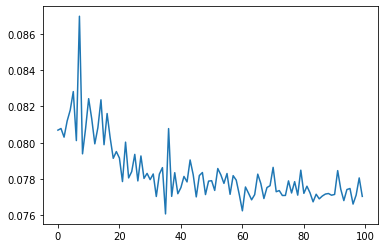

In [268]:
plt.figure()
plt.plot(hist.history['loss'])